In [49]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib

In [50]:
data = pd.read_csv('ex2data1.txt', delimiter=',', header=None, names=['exam1', 'exam2', 'isAdmitted'])
data.head(5)
print(data)

        exam1      exam2  isAdmitted
0   34.623660  78.024693           0
1   30.286711  43.894998           0
2   35.847409  72.902198           0
3   60.182599  86.308552           1
4   79.032736  75.344376           1
..        ...        ...         ...
95  83.489163  48.380286           1
96  42.261701  87.103851           1
97  99.315009  68.775409           1
98  55.340018  64.931938           1
99  74.775893  89.529813           1

[100 rows x 3 columns]


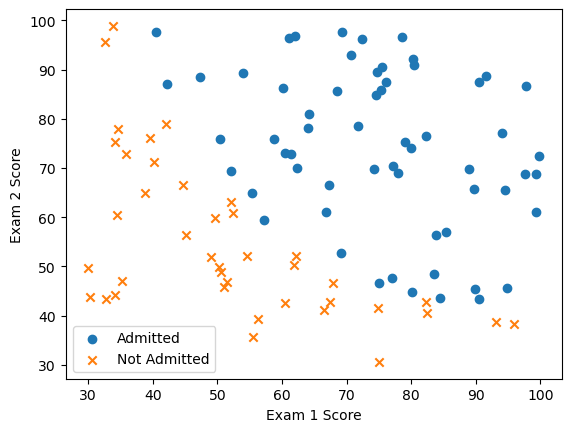

In [51]:
positive = data[data['isAdmitted'].isin([1])]
negative = data[data['isAdmitted'].isin([0])]

plt.scatter(positive['exam1'], positive['exam2'], marker='o', label='Admitted')
plt.scatter(negative['exam1'], negative['exam2'], marker='x', label='Not Admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(loc='best')
plt.style.use('default')
plt.show()

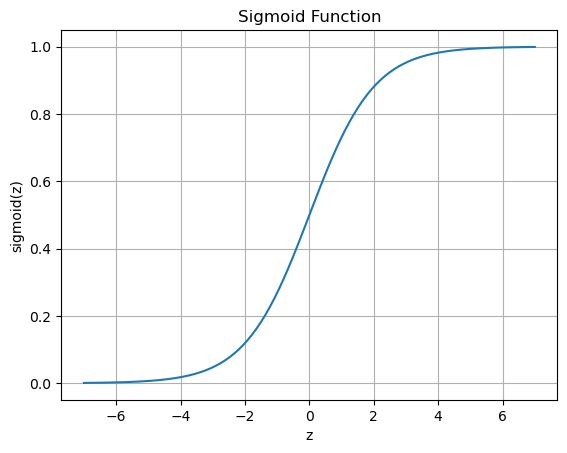

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate a range of values for z
z = np.linspace(-7, 7, 200)  # Values between -7 and 7

# Compute the sigmoid function for the range of z values
sigmoid_values = sigmoid(z)

# Plot the sigmoid function
plt.plot(z, sigmoid_values)
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid(True)
plt.show()


In [53]:
def compute_cost(theta, X, y):
    m = len(y)
    epsilon = 1e-20  # 微小的常数，用于避免log(0)或log(1)
    h = sigmoid(np.dot(X, theta))
    cost = -1 / m * (np.dot(y, np.log(h + epsilon)) + np.dot((1 - y), np.log(1 - h + epsilon)))
    return cost


In [54]:
def compute_gradient(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    gradient = np.dot(X.T, (h - y)) / m
    return gradient


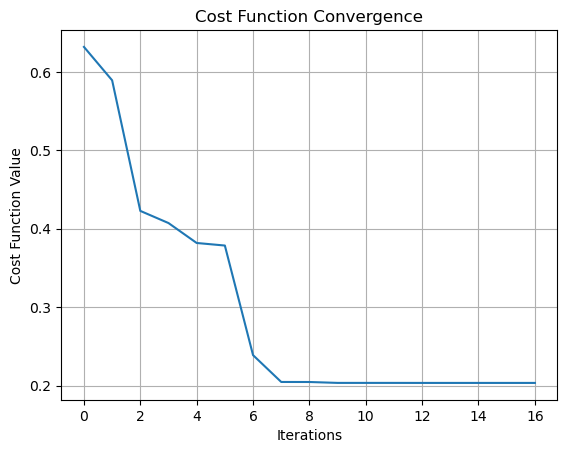

In [55]:
from scipy.optimize import fmin_tnc

X = np.c_[np.ones((data.shape[0], 1)), data[['exam1', 'exam2']].values]
y = data['isAdmitted'].values
initial_theta = np.zeros(X.shape[1])

def cost_history(theta, X, y):
    history = []
    
    def callback(theta_i):
        cost = compute_cost(theta_i, X, y)
        history.append(cost)
    
    result = fmin_tnc(func=compute_cost, x0=theta, fprime=compute_gradient, args=(X, y), callback=callback)
    optimal_theta = result[0]
    
    return optimal_theta, history

optimal_theta, cost_history_values = cost_history(initial_theta, X, y)

# Plot the cost function values over iterations
plt.plot(cost_history_values)
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function Convergence')
plt.grid(True)
plt.show()


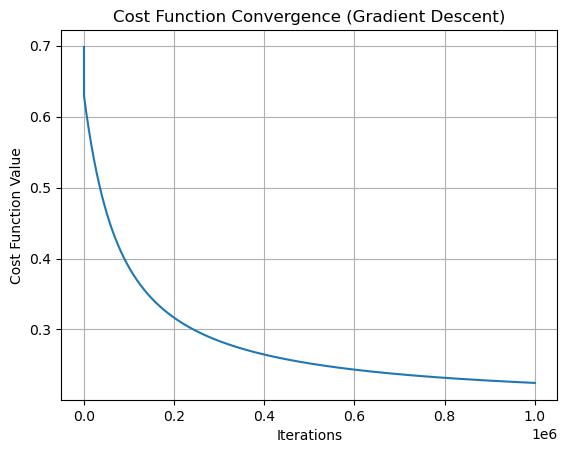

In [56]:

# Define the gradient descent function with cost history tracking
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        cost = compute_cost(theta, X, y)
        cost_history.append(cost)

    return theta, cost_history

# Initialize data and parameters
X = np.c_[np.ones((data.shape[0], 1)), data[['exam1', 'exam2']].values]
y = data['isAdmitted'].values
initial_theta = np.zeros(X.shape[1])
alpha = 0.001
num_iterations = 1000000

# Run gradient descent and track cost history
optimal_theta, cost_history_values = gradient_descent(X, y, initial_theta, alpha, num_iterations)

# Plot the cost function values over iterations
plt.plot(cost_history_values)
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function Convergence (Gradient Descent)')
plt.grid(True)
plt.show()

In [57]:
def predict(theta, X):
    probability = sigmoid(np.dot(X, theta))
    return [1 if x >= 0.5 else 0 for x in probability]

predictions = predict(optimal_theta, X)
accuracy = np.mean(predictions == y) * 100
print(f'Accuracy: {accuracy}%')


Accuracy: 89.0%


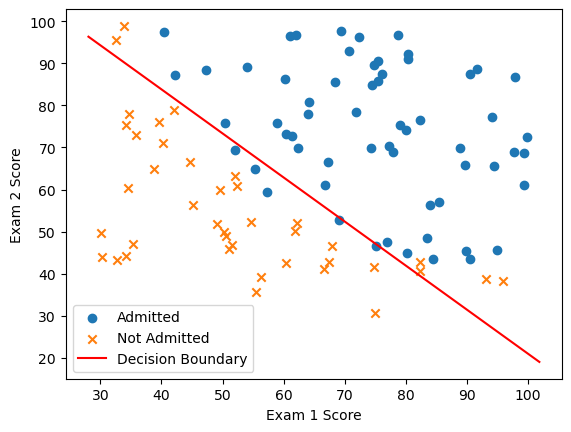

In [58]:
boundary_x = np.array([min(X[:,1]) - 2, max(X[:,1]) + 2])
boundary_y = (-1/optimal_theta[2]) * (optimal_theta[1] * boundary_x + optimal_theta[0])

plt.scatter(positive['exam1'], positive['exam2'], marker='o', label='Admitted')
plt.scatter(negative['exam1'], negative['exam2'], marker='x', label='Not Admitted')
plt.plot(boundary_x, boundary_y, label='Decision Boundary', c='r')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(loc='best')
plt.show()


In [59]:
print(optimal_theta)

[-15.39517866   0.12825989   0.12247929]


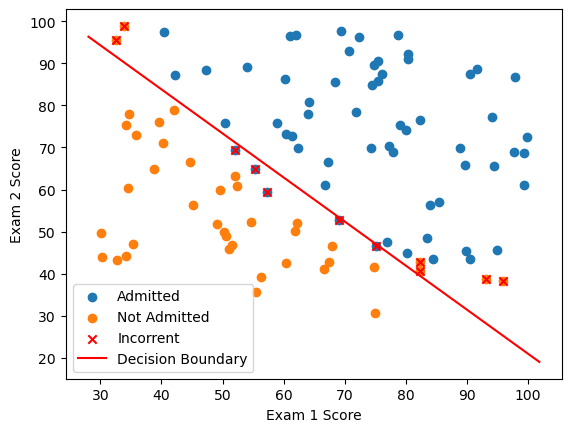

In [60]:
# 计算预测结果
predictions = predict(optimal_theta, X)

# 分离正确和错误预测的样本
correct_predictions = data[predictions == y]
incorrect_predictions = data[predictions != y]

plt.scatter(positive['exam1'], positive['exam2'], marker='o', label='Admitted')
plt.scatter(negative['exam1'], negative['exam2'], marker='o', label='Not Admitted')
plt.scatter(incorrect_predictions['exam1'], incorrect_predictions['exam2'], marker = 'x', label='Incorrent', color='r')
plt.plot(boundary_x, boundary_y, label='Decision Boundary', c='r')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(loc='best')
plt.show()

0.0005


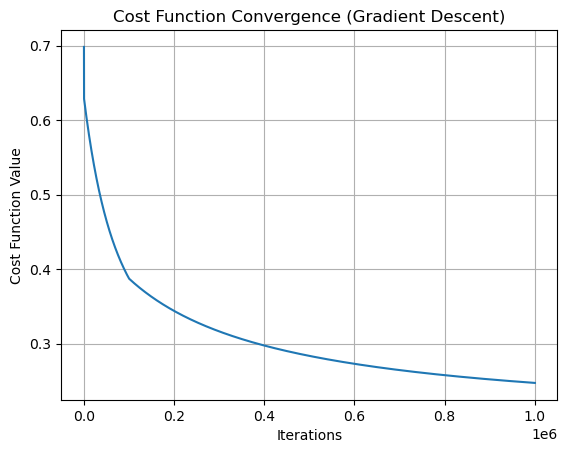

Accuracy: 91.0%


In [61]:
def gradient_descent_with_decay(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []
    f = 0
    for i in range(num_iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        cost = compute_cost(theta, X, y)
        cost_history.append(cost)

        # 学习率衰减（这是一个示例，你可以根据需要调整衰减函数）
        if i > 100000 and f == 0:
            alpha = alpha / 2  # 逐渐减小学习率
            f = 1
            print(alpha)


    return theta, cost_history

# 初始化数据和参数
X = np.c_[np.ones((data.shape[0], 1)), data[['exam1', 'exam2']].values]
y = data['isAdmitted'].values
initial_theta = np.zeros(X.shape[1])
alpha = 0.001  # 初始学习率
num_iterations = 1000000

# 运行带有学习率衰减的梯度下降并跟踪成本历史
optimal_theta, cost_history_values = gradient_descent_with_decay(X, y, initial_theta, alpha, num_iterations)

# Plot the cost function values over iterations
plt.plot(cost_history_values)
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function Convergence (Gradient Descent)')
plt.grid(True)
plt.show()

def predict(theta, X):
    probability = sigmoid(np.dot(X, theta))
    return [1 if x >= 0.5 else 0 for x in probability]

predictions = predict(optimal_theta, X)
accuracy = np.mean(predictions == y) * 100
print(f'Accuracy: {accuracy}%')